In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imutils import paths
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=[]
labels= []
imagePaths = sorted(list(paths.list_images('dataset/training_set')))

for i in imagePaths:
    image= cv2.imread(i)
    image= cv2.resize(image,(64,64)).flatten()
    data.append(image)

    label= i.split(os.path.sep)[-2]
    labels.append(label)

In [3]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [4]:
X_train,X_test,y_train,y_test= train_test_split(data,labels,test_size=0.2,random_state=42)

In [5]:
label_binarizer= LabelBinarizer()

In [6]:
y_train= label_binarizer.fit_transform(y_train)

In [7]:
y_test= label_binarizer.transform(y_test)

In [8]:
rfc= RandomForestClassifier().fit(X_train,y_train)

In [9]:
rfc.score(X_train,y_train)

1.0

In [10]:
rfc.score(X_test,y_test)

0.6425

In [11]:
y_pred= rfc.predict(X_test)

In [12]:
conf= confusion_matrix(y_test,y_pred)
clssi= classification_report(y_test,y_pred)
print('Confusion Matrix')
print(conf)
print('\n')
print('Classification Report')
print(clssi)

Confusion Matrix
[[284 138]
 [148 230]]


Classification Report
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       422
           1       0.62      0.61      0.62       378

    accuracy                           0.64       800
   macro avg       0.64      0.64      0.64       800
weighted avg       0.64      0.64      0.64       800



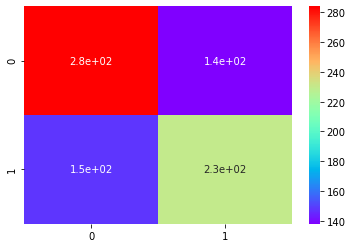

In [13]:
sns.heatmap(conf,annot=True,cmap='rainbow');

In [14]:
data=[]
labels= []
imagePaths = sorted(list(paths.list_images('dataset/test_set')))

for i in imagePaths:
    image= cv2.imread(i)
    image= cv2.resize(image,(64,64)).flatten()
    data.append(image)

    label= i.split(os.path.sep)[-2]
    labels.append(label)

In [15]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [16]:
labels

array(['cats', 'cats', 'cats', ..., 'dogs', 'dogs', 'dogs'], dtype='<U4')

In [17]:
real_test= rfc.predict(data)

In [18]:
real_test

array([0, 0, 0, ..., 1, 0, 0])

In [19]:
labels= label_binarizer.transform(labels)

In [20]:
labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [21]:
print(confusion_matrix(real_test,labels))

[[662 399]
 [338 601]]


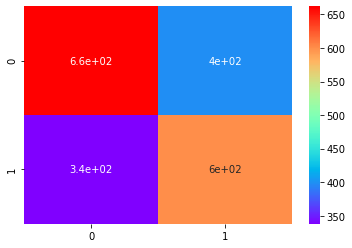

In [22]:
sns.heatmap(confusion_matrix(real_test,labels),annot=True,cmap='rainbow');

In [23]:
data=[]
labels= []
imagePaths = sorted(list(paths.list_images('dataset/single_prediction/')))

for i in imagePaths:
    image= cv2.imread(i)
    image= cv2.resize(image,(64,64)).flatten()
    data.append(image)

In [24]:
predict=rfc.predict(data)

In [25]:
predict

array([0, 0])

In [28]:
for i in predict:
    if i==0:
        print('cat')
    else:
        print('Dog') 

cat
cat
